In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california.csv", index_col = 0)

'id',: id de la casa<br>
'state',: el estado al que pertenece<br>
'gender',: el género de la persona que alquila la casa<br>
'median_home_val',: el valor de la casa<br>
'median_household_income',:_ la mediana de la renta de la poblacion<br>
'ic2', poblacion de la zona<br>
'ic3', numero de vecinos en el bloque<br>
'ic4', total de habitaciones<br>
'ic5', total de baños<br>
'avggift',:_ distancia a la playa<br>
'target_d': esta variable no la usaremos, asi que la podeis elimina<br>

In [4]:
df.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,44060,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,100.0
1,96093,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,7.0
2,43333,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,5.0
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
4,190108,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,5.0


In [5]:
df.shape

(3993, 11)

In [6]:
df.duplicated(subset=["id"]).sum()

0

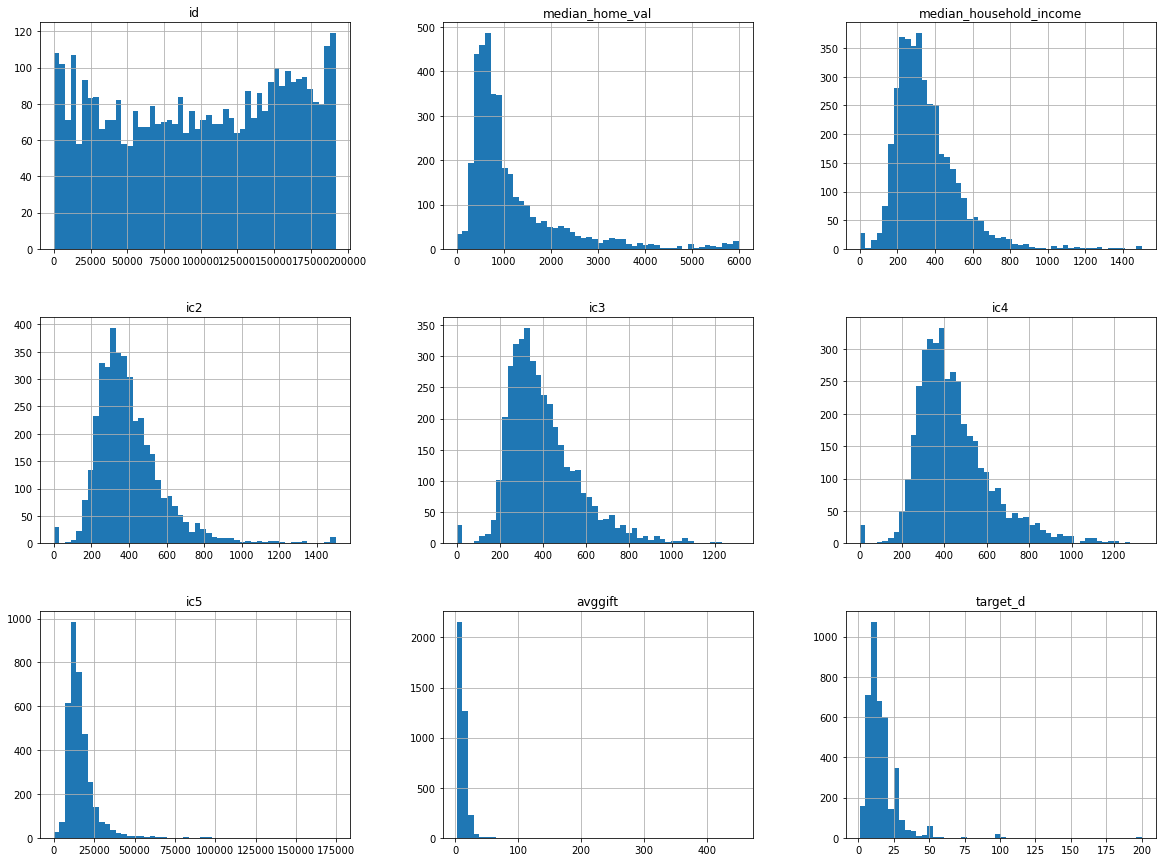

In [7]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [8]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)


median_home_val            1.000000
ic5                        0.744776
ic4                        0.742227
ic2                        0.737371
ic3                        0.732857
median_household_income    0.700940
id                         0.253189
avggift                    0.125058
target_d                   0.110053
Name: median_home_val, dtype: float64

In [9]:
df["rooms_per_neigh"] = df["ic4"]/df["ic3"]
#df["baths_per_neigh"] = df["ic5"]/df["ic3"]
df["population_per_household"] = df["ic2"]/df["ic3"]


In [10]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)

median_home_val             1.000000
ic5                         0.744776
ic4                         0.742227
ic2                         0.737371
ic3                         0.732857
median_household_income     0.700940
id                          0.253189
avggift                     0.125058
target_d                    0.110053
population_per_household    0.096456
rooms_per_neigh            -0.076728
Name: median_home_val, dtype: float64

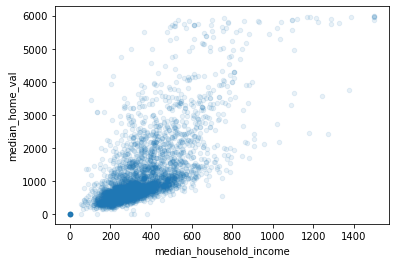

In [11]:
df.plot(kind="scatter", x="median_household_income", y="median_home_val",
 alpha=0.1)

plt.show()


In [12]:
df.isnull().sum()

id                            0
state                         9
gender                        0
median_home_val             200
median_household_income     120
ic2                           8
ic3                          80
ic4                          40
ic5                         399
avggift                     280
target_d                      0
rooms_per_neigh             147
population_per_household    117
dtype: int64

In [13]:
df["gender"].unique()

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

In [14]:
f = ['female','Female','feamale']
m = ['Male','male']

for i in f:
    df["gender"] = df["gender"].str.replace(i, 'F')
for i in m:
    df["gender"] = df["gender"].str.replace(i,'M')

In [15]:
df["gender"].unique()

array(['M', 'F', 'U', 'J', 'A'], dtype=object)

In [16]:
df["gender"].value_counts()

F    2276
M    1625
U      68
J      23
A       1
Name: gender, dtype: int64

In [17]:
df["gender"].value_counts()[0]+df["gender"].value_counts()[1]

3901

In [18]:
g = ['U','J','A']

for i in g:
    df.drop(df[df["gender"] == i].index, inplace=True)

In [19]:
df["gender"].value_counts()

F    2276
M    1625
Name: gender, dtype: int64

In [20]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'Cali', 'AP', 'MI', 'MT', 'TX',
       'WI', 'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA',
       'CO', 'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK',
       'NE', 'AR', 'KS', 'ID', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'NJ', 'AA', 'PA', 'VT', 'WV',
       'GU'], dtype=object)

In [21]:
df["state"] = df["state"].str.replace('California', 'CA')
df["state"] = df["state"].str.replace('Cali', 'CA')
df["state"] = df["state"].str.replace('Arizona', 'AZ')
df["state"] = df["state"].str.replace('Tennessee', 'TN')


In [22]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'AP', 'MI', 'MT', 'TX', 'WI',
       'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA', 'CO',
       'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK', 'NE',
       'AR', 'KS', 'ID', 'MS', 'NY', 'WY', 'MD', 'AK', 'VA', 'AE', 'NJ',
       'AA', 'PA', 'VT', 'WV', 'GU'], dtype=object)

In [23]:
df.isnull().sum()

id                            0
state                         8
gender                        0
median_home_val             196
median_household_income     118
ic2                           8
ic3                          77
ic4                          40
ic5                         391
avggift                     271
target_d                      0
rooms_per_neigh             144
population_per_household    114
dtype: int64

In [24]:
df.dropna(subset = ['state', 'ic2', 'ic3', 'ic4'], inplace = True)

In [25]:
df.isnull().sum()

id                            0
state                         0
gender                        0
median_home_val             194
median_household_income     116
ic2                           0
ic3                           0
ic4                           0
ic5                         375
avggift                     258
target_d                      0
rooms_per_neigh              28
population_per_household     28
dtype: int64

In [26]:
df_numericas = df.select_dtypes(include=np.number)

In [27]:
df_numericas = df_numericas.drop(['id', 'target_d'], axis = 1)

In [28]:
df_numericas.head(5)

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,rooms_per_neigh,population_per_household
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,1.115880,0.922747
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,1.153659,1.012195
2,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,1.207756,0.941828
3,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,1.035088,1.020050
4,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,1.101266,0.886076


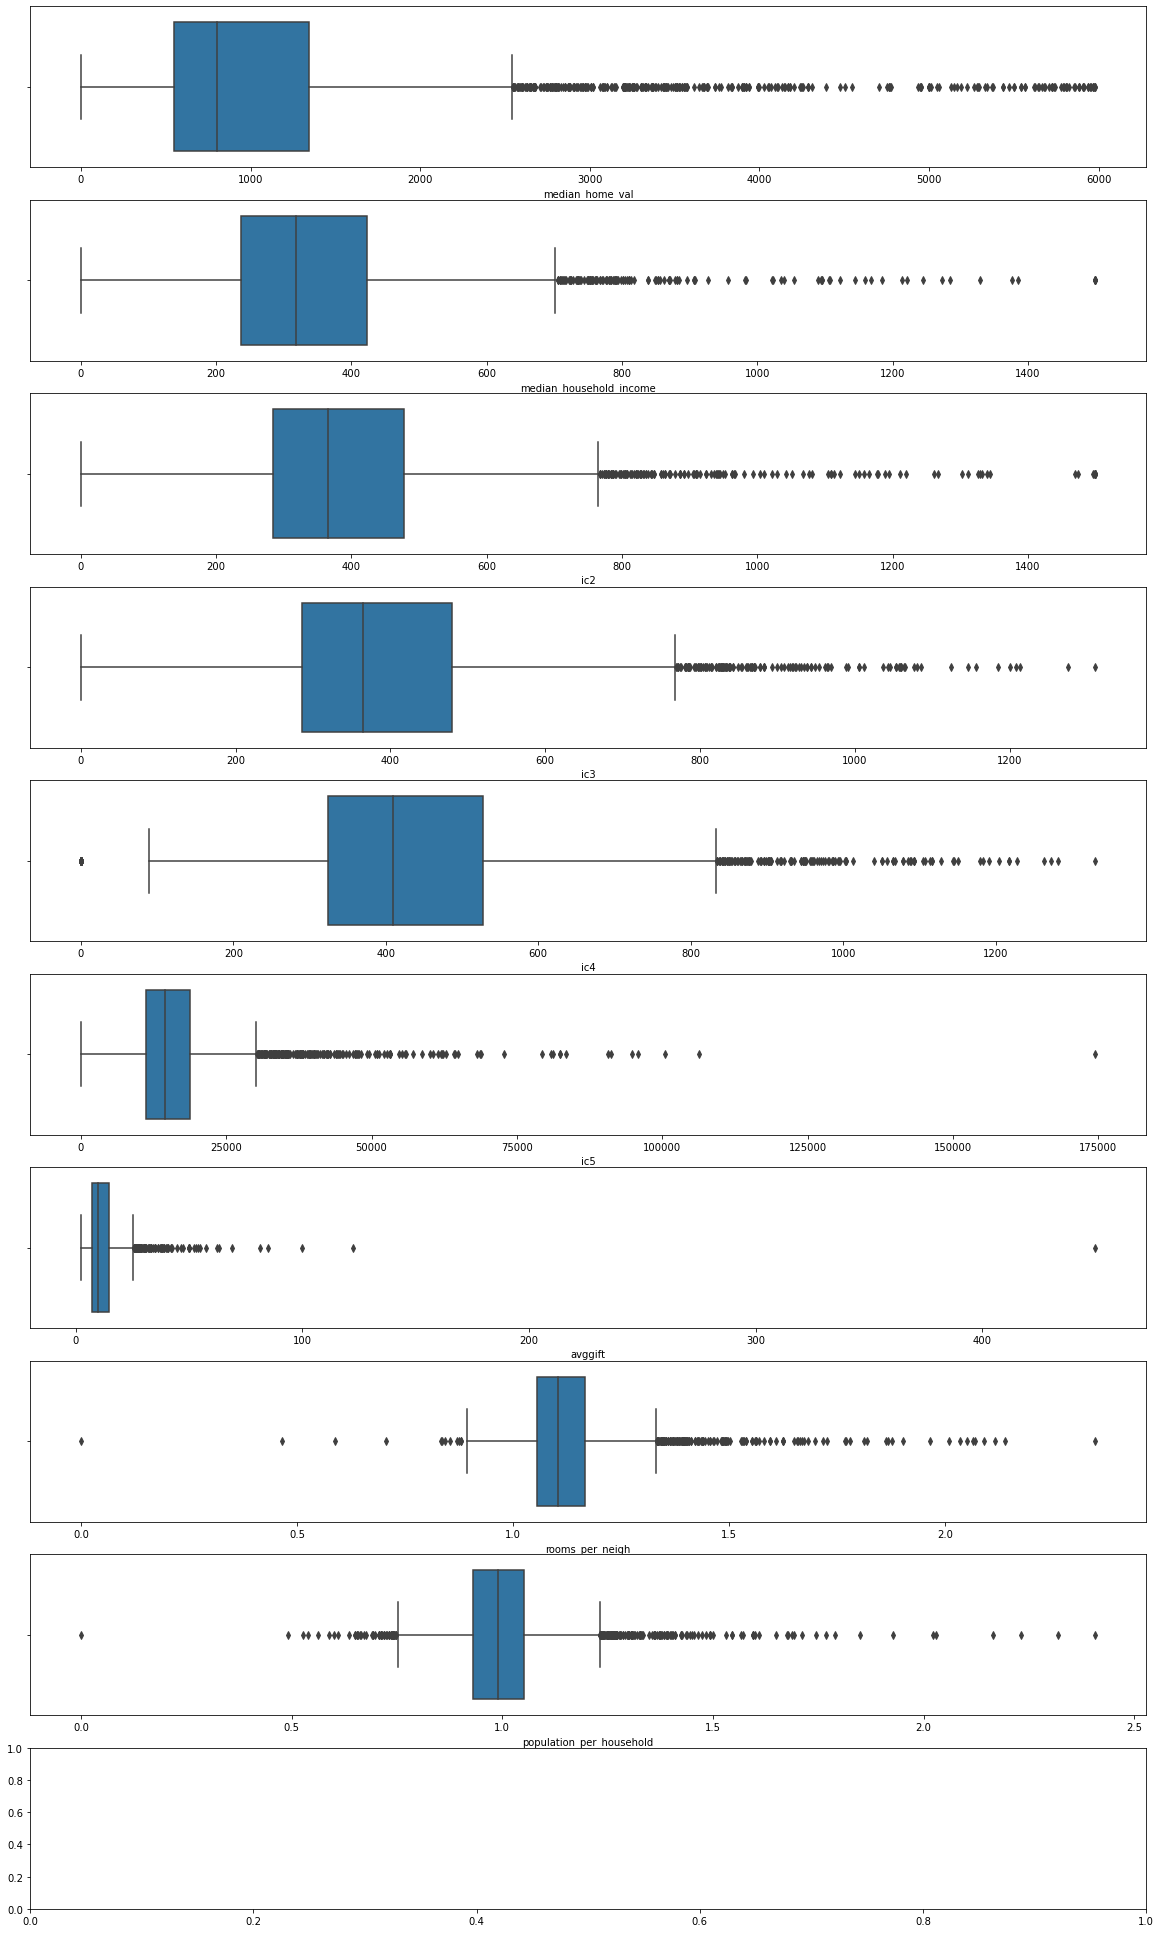

In [29]:
fig, ax = plt.subplots(10, 1, figsize=(20,35))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [30]:
for i in df_numericas.columns:
    print(i,df_numericas[i].min())

median_home_val 0.0
median_household_income 0.0
ic2 0.0
ic3 0.0
ic4 0.0
ic5 0.0
avggift 2.260869565
rooms_per_neigh 0.0
population_per_household 0.0


In [31]:
df_numericas["avggift"].max()

450.0

In [32]:
df_numericas["ic5"].max()

174523.0

In [33]:
df_numericas["ic4"].min()

0.0

In [34]:
df.shape

(3770, 13)

In [35]:
df.drop(df[df['avggift'] == 450.0].index, inplace=True)

In [36]:
df.drop(df[df['ic5'] == 174523.0].index, inplace=True)

In [37]:
df.drop(df[df['ic4'] == 0.0].index, inplace=True)

In [38]:
df.shape

(3739, 13)

In [39]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [40]:
outliers = outliers_index(df, df_numericas.columns)[1]

In [41]:
len(outliers)

719

In [42]:
df_no_outliers = df.drop(index=outliers)

In [43]:
df_no_outliers.shape

(3020, 13)

In [44]:
df_no_outliers.isnull().sum()

id                            0
state                         0
gender                        0
median_home_val             164
median_household_income      88
ic2                           0
ic3                           0
ic4                           0
ic5                         315
avggift                     212
target_d                      0
rooms_per_neigh               0
population_per_household      0
dtype: int64

In [45]:
num_no_liers = df_no_outliers.select_dtypes(include=np.number)
num_no_liers = num_no_liers.drop(['id', 'target_d'], axis = 1)

In [46]:
num_no_liers.shape

(3020, 9)

In [47]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(num_no_liers)

KNNImputer()

In [48]:
num_no_liers_knn = imputerKNN.transform(num_no_liers)

In [49]:
df_no_outliers_knn = pd.DataFrame(num_no_liers_knn, columns=num_no_liers.columns)

In [50]:
df_no_outliers_knn.shape

(3020, 9)

In [51]:
df_no_outliers_knn.isnull().sum()

median_home_val             0
median_household_income     0
ic2                         0
ic3                         0
ic4                         0
ic5                         0
avggift                     0
rooms_per_neigh             0
population_per_household    0
dtype: int64

In [52]:
columns_no_outliers_knn = df_no_outliers_knn.columns

In [53]:
columns_no_outliers_knn

Index(['median_home_val', 'median_household_income', 'ic2', 'ic3', 'ic4',
       'ic5', 'avggift', 'rooms_per_neigh', 'population_per_household'],
      dtype='object')

In [101]:
df_no_outliers.drop(columns_no_outliers_knn, axis=1, inplace=True)

In [102]:
df_no_outliers.shape

(3020, 4)

In [55]:
df_no_outliers.isnull().sum()

id          0
state       0
gender      0
target_d    0
dtype: int64

In [103]:
result = pd.concat([df_no_outliers, df_no_outliers_knn], axis=1)

In [106]:
result_1 = df_no_outliers.merge(df_no_outliers_knn, right_index=True, left_index=True, how='inner')

In [107]:
result_1.shape

(2278, 13)

In [108]:
result_1.isnull().sum()

id                          0
state                       0
gender                      0
target_d                    0
median_home_val             0
median_household_income     0
ic2                         0
ic3                         0
ic4                         0
ic5                         0
avggift                     0
rooms_per_neigh             0
population_per_household    0
dtype: int64

In [57]:
result.shape

(3762, 13)

In [58]:
result.dropna(how='all', inplace=True)

In [59]:
result.isnull().sum()

id                          742
state                       742
gender                      742
target_d                    742
median_home_val             742
median_household_income     742
ic2                         742
ic3                         742
ic4                         742
ic5                         742
avggift                     742
rooms_per_neigh             742
population_per_household    742
dtype: int64

In [60]:
df_no_outliers[columns_no_outliers_knn] = df_no_outliers_knn[columns_no_outliers_knn]

In [61]:
#df_no_outliers["baths_per_neigh"] = df_no_outliers["ic5"]/df_no_outliers["ic3"]

In [62]:
df_no_outliers.shape

(3020, 13)

In [63]:
df_no_outliers.head(5)

,id,state,gender,target_d,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,rooms_per_neigh,population_per_household
0,44060,FL,M,100.0,1158.437751,392.0,430.0,466.0,520.0,21975.0,11.626154,1.115880,0.922747
1,96093,IL,M,7.0,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,1.153659,1.012195
2,43333,FL,F,5.0,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,1.207756,0.941828
4,190108,FL,F,5.0,1026.000000,459.0,470.0,491.0,496.0,13803.0,11.250000,1.010183,0.957230
11,154301,CA,F,10.0,1538.000000,271.0,317.0,342.0,393.0,15627.0,5.500000,1.149123,0.926901


In [64]:
df_no_outliers.isnull().sum()

id                            0
state                         0
gender                        0
target_d                      0
median_home_val             742
median_household_income     742
ic2                         742
ic3                         742
ic4                         742
ic5                         742
avggift                     742
rooms_per_neigh             742
population_per_household    742
dtype: int64

In [65]:
df_outliers = df.loc[outliers]

In [66]:
df_outliers.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d,rooms_per_neigh,population_per_household
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0,1.035088,1.020050
2052,107569,NE,M,443.000000,231.0,288.0,281.0,323.0,11042.0,36.111111,50.0,1.149466,1.024911
9,141720,NV,F,1569.000000,673.0,672.0,785.0,781.0,25775.0,13.000000,5.0,0.994904,0.856051
10,186272,CA,F,3515.000000,521.0,565.0,549.0,588.0,20068.0,8.640000,10.0,1.071038,1.029144
2059,1068,CA,F,3528.000000,814.0,808.0,867.0,867.0,25564.0,6.162791,5.0,1.000000,0.931949


In [67]:
df_outliers.shape

(719, 13)

In [68]:
df_outliers.isnull().sum()

id                           0
state                        0
gender                       0
median_home_val             29
median_household_income     27
ic2                          0
ic3                          0
ic4                          0
ic5                         55
avggift                     45
target_d                     0
rooms_per_neigh              0
population_per_household     0
dtype: int64

In [69]:
num_liers = df_outliers.select_dtypes(include=np.number)
num_liers = num_liers.drop(['id', 'target_d'], axis = 1)

In [70]:
num_liers.shape

(719, 9)

In [71]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(num_liers)

KNNImputer()

In [72]:
num_liers_knn = imputerKNN.transform(num_liers)
df_outliers_knn = pd.DataFrame(num_liers_knn, columns=num_no_liers.columns)

In [73]:
df_outliers_knn.shape

(719, 9)

In [74]:
df_outliers_knn.isnull().sum()

median_home_val             0
median_household_income     0
ic2                         0
ic3                         0
ic4                         0
ic5                         0
avggift                     0
rooms_per_neigh             0
population_per_household    0
dtype: int64

In [75]:
columns_outliers_knn = df_outliers_knn.columns
columns_outliers_knn

Index(['median_home_val', 'median_household_income', 'ic2', 'ic3', 'ic4',
       'ic5', 'avggift', 'rooms_per_neigh', 'population_per_household'],
      dtype='object')

In [76]:
df_outliers.drop(columns_outliers_knn, axis=1, inplace=True)

In [77]:
df_outliers.isnull().sum()

id          0
state       0
gender      0
target_d    0
dtype: int64

In [78]:
df_outliers[columns_outliers_knn] = df_outliers_knn[columns_outliers_knn]

In [79]:
df_outliers.shape

(719, 13)

In [80]:
df_outliers.isnull().sum()

id                            0
state                         0
gender                        0
target_d                      0
median_home_val             568
median_household_income     568
ic2                         568
ic3                         568
ic4                         568
ic5                         568
avggift                     568
rooms_per_neigh             568
population_per_household    568
dtype: int64

In [81]:
df_no_outliers.to_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california_no_outliers.csv")
df_outliers.to_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california_outliers.csv")